In [15]:
# Chess.com Game Analysis - Fresh Start
# Comprehensive analysis of 10,000+ chess games to identify patterns and improvement opportunities

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("📚 Libraries imported successfully!")
print("🏗️  Setting up comprehensive chess game analysis...")

📚 Libraries imported successfully!
🏗️  Setting up comprehensive chess game analysis...


# Chess.com Game Analysis Dashboard

This notebook provides a comprehensive analysis of my chess.com gaming history, examining patterns, strengths, and areas for improvement across 10,000+ games.

## Analysis Structure:
1. **Data Import & Preprocessing** - Load and clean the dataset
2. **Performance Overview** - Win rates, rating trends, and basic statistics  
3. **Temporal Analysis** - Performance by time, day, and season
4. **Opening Repertoire** - Strengths, weaknesses, and diversity
5. **Game Characteristics** - Duration, termination, and patterns
6. **Improvement Plan** - Actionable insights and study recommendations

In [2]:
# Load the chess.com games dataset
DATA_PATH = "chesscom_sanjaykshetri123_games.csv"

try:
    df = pd.read_csv(DATA_PATH)
    print(f"✅ Successfully loaded {len(df):,} games from {DATA_PATH}")
    print(f"📊 Dataset shape: {df.shape}")
    print(f"📅 Date range: {df['end_time_utc'].min()} to {df['end_time_utc'].max()}")
except FileNotFoundError:
    print(f"❌ Error: Could not find {DATA_PATH}")
    print("Please ensure the CSV file is in the current directory")
except Exception as e:
    print(f"❌ Error loading data: {str(e)}")

✅ Successfully loaded 10,501 games from chesscom_sanjaykshetri123_games.csv
📊 Dataset shape: (10501, 22)
📅 Date range: 2019-11-10T18:52:00+00:00 to 2025-08-09T19:37:14+00:00


In [ ]:
# Data preprocessing and feature engineering
LOCAL_TZ = "America/New_York"  # Adjust this to my timezone

# Create result score mapping for analysis
score_map = {"W": 1.0, "D": 0.5, "L": 0.0}
df["score"] = df["your_result"].map(score_map)

# Parse and convert timestamps (they're already timezone-aware)
df["end_time_utc"] = pd.to_datetime(df["end_time_utc"], errors='coerce')
df["end_time_local"] = df["end_time_utc"].dt.tz_convert(LOCAL_TZ)

# Extract temporal features
df["date"] = df["end_time_local"].dt.date
df["year"] = df["end_time_local"].dt.year
df["month"] = df["end_time_local"].dt.month
df["hour"] = df["end_time_local"].dt.hour
df["day_of_week"] = df["end_time_local"].dt.day_name()
df["is_weekend"] = df["end_time_local"].dt.weekday >= 5

# Parse time controls
df["base_minutes"] = df["base_secs"] / 60
df["increment_seconds"] = df["inc_secs"].fillna(0)

print("🔧 Data preprocessing completed!")
print(f"📈 Score column created (W=1.0, D=0.5, L=0.0)")
print(f"🕐 Timestamps converted to {LOCAL_TZ} timezone")
print(f"📅 Temporal features extracted (year, month, hour, day_of_week)")
print(f"⏱️  Time control features processed")

🔧 Data preprocessing completed!
📈 Score column created (W=1.0, D=0.5, L=0.0)
🕐 Timestamps converted to America/New_York timezone
📅 Temporal features extracted (year, month, hour, day_of_week)
⏱️  Time control features processed


## 📊 Data Exploration and Overview

Let's examine the structure of our dataset and get an initial understanding of the game distribution.

In [5]:
# Dataset overview and basic statistics
print("=" * 60)
print("🏆 CHESS.COM GAME ANALYSIS - DATASET OVERVIEW")
print("=" * 60)

print(f"\n📈 BASIC STATISTICS:")
print(f"• Total Games: {len(df):,}")
print(f"• Date Range: {df['date'].min()} to {df['date'].max()}")
print(f"• Analysis Period: {(df['date'].max() - df['date'].min()).days} days")

# Result distribution
result_counts = df['your_result'].value_counts()
result_pcts = df['your_result'].value_counts(normalize=True) * 100

print(f"\n🎯 OVERALL RESULTS:")
for result in ['W', 'D', 'L']:
    count = result_counts.get(result, 0)
    pct = result_pcts.get(result, 0)
    result_name = {'W': 'Wins', 'D': 'Draws', 'L': 'Losses'}[result]
    print(f"• {result_name}: {count:,} ({pct:.1f}%)")

overall_score = df['score'].mean() * 100
print(f"• Overall Score: {overall_score:.1f}%")

# Check for missing data
print(f"\n🔍 DATA QUALITY:")
missing_data = df.isnull().sum()
critical_cols = ['your_result', 'your_side', 'time_class', 'your_rating']
for col in critical_cols:
    missing = missing_data.get(col, 0)
    print(f"• {col}: {missing} missing values ({missing/len(df)*100:.1f}%)")

print(f"\n📋 COLUMN OVERVIEW:")
print(f"• Total columns: {len(df.columns)}")
print(f"• Key columns available: {', '.join(df.columns[:8])}...")

🏆 CHESS.COM GAME ANALYSIS - DATASET OVERVIEW

📈 BASIC STATISTICS:
• Total Games: 10,501
• Date Range: 2019-11-10 to 2025-08-09
• Analysis Period: 2099 days

🎯 OVERALL RESULTS:
• Wins: 5,160 (49.1%)
• Draws: 308 (2.9%)
• Losses: 5,033 (47.9%)
• Overall Score: 50.6%

🔍 DATA QUALITY:
• your_result: 0 missing values (0.0%)
• your_side: 0 missing values (0.0%)
• time_class: 0 missing values (0.0%)
• your_rating: 0 missing values (0.0%)

📋 COLUMN OVERVIEW:
• Total columns: 32
• Key columns available: game_id, game_url, end_time_utc, rated, time_class, time_control, base_secs, inc_secs...


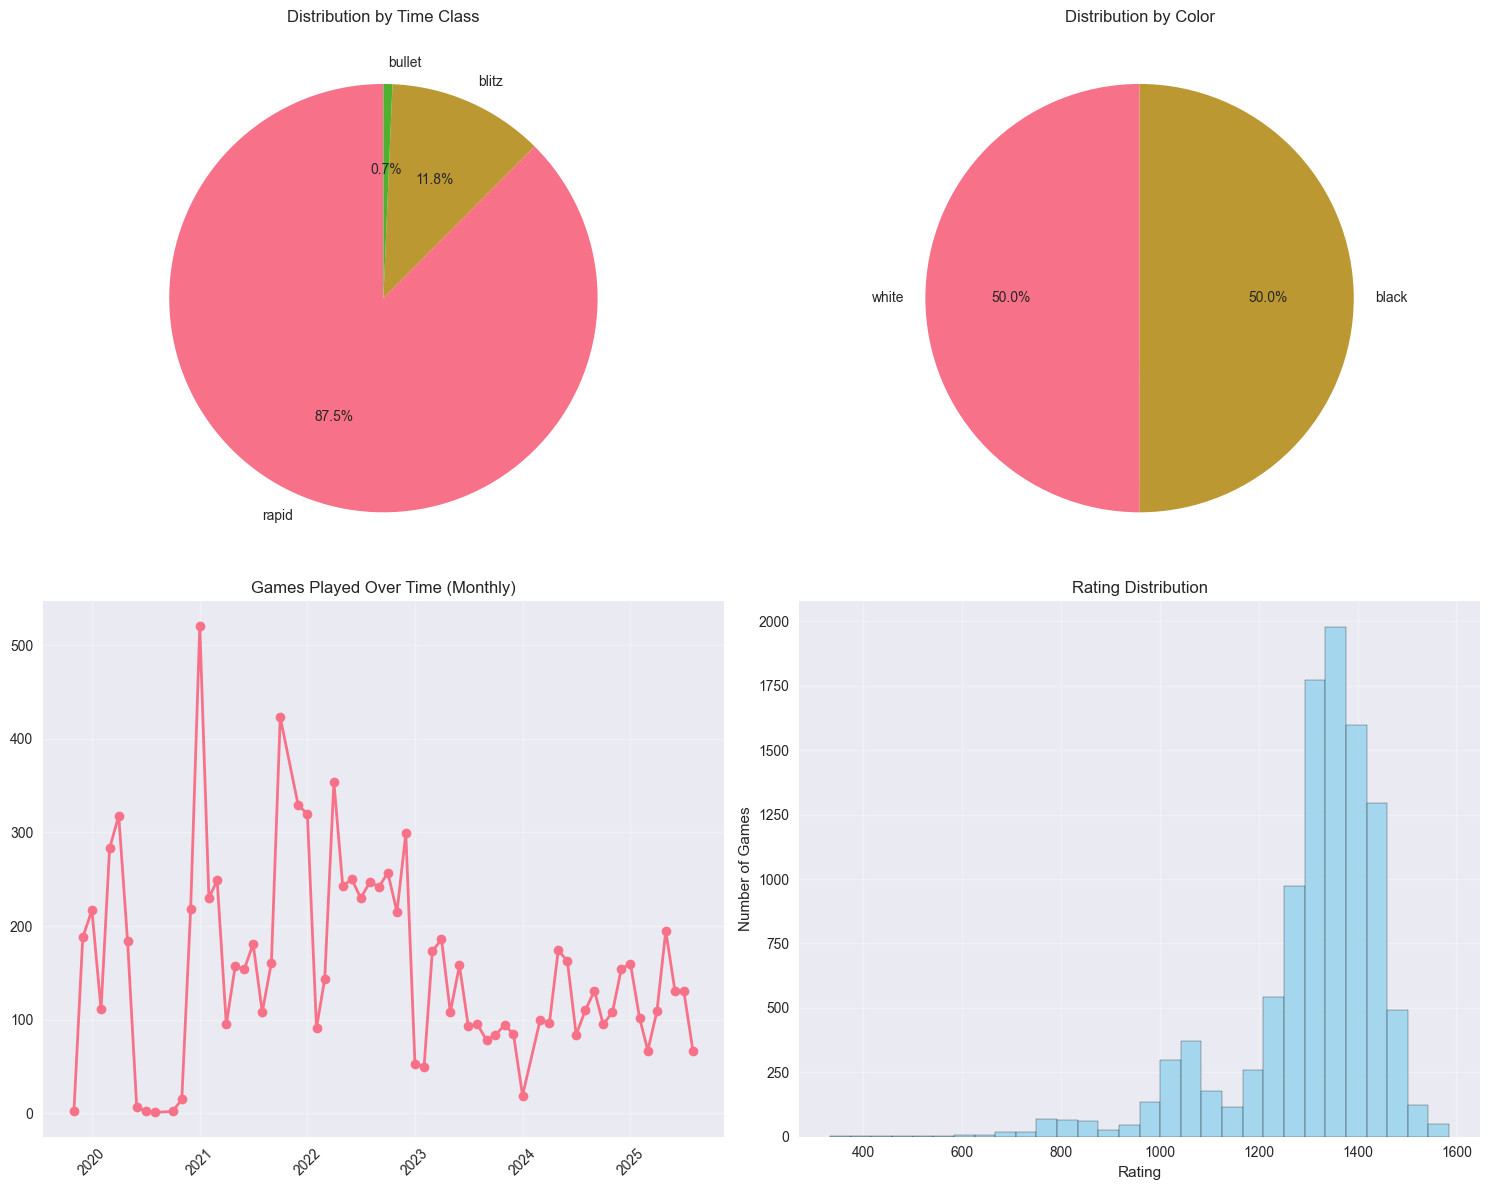


📊 TIME CLASS BREAKDOWN:
• Rapid: 9,191 games (87.5%) - Avg Rating: 1352
• Blitz: 1,239 games (11.8%) - Avg Rating: 1018
• Bullet: 71 games (0.7%) - Avg Rating: 666

🏅 RATING STATISTICS:
• Current/Latest Rating: 1347
• Highest Rating: 1585
• Lowest Rating: 333
• Average Rating: 1308
• Rating Standard Deviation: 147


In [6]:
# Game distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Time class distribution
time_class_counts = df['time_class'].value_counts()
axes[0,0].pie(time_class_counts.values, labels=time_class_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribution by Time Class')

# Color distribution
color_counts = df['your_side'].value_counts()
axes[0,1].pie(color_counts.values, labels=color_counts.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribution by Color')

# Games over time (monthly)
monthly_games = df.groupby([df['year'], df['month']]).size()
monthly_index = pd.to_datetime([f"{year}-{month:02d}-01" for year, month in monthly_games.index])
axes[1,0].plot(monthly_index, monthly_games.values, marker='o', linewidth=2)
axes[1,0].set_title('Games Played Over Time (Monthly)')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].grid(True, alpha=0.3)

# Rating distribution
axes[1,1].hist(df['your_rating'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[1,1].set_title('Rating Distribution')
axes[1,1].set_xlabel('Rating')
axes[1,1].set_ylabel('Number of Games')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print(f"\n📊 TIME CLASS BREAKDOWN:")
for time_class in df['time_class'].value_counts().index:
    count = time_class_counts[time_class]
    pct = count / len(df) * 100
    avg_rating = df[df['time_class'] == time_class]['your_rating'].mean()
    print(f"• {time_class.capitalize()}: {count:,} games ({pct:.1f}%) - Avg Rating: {avg_rating:.0f}")

print(f"\n🏅 RATING STATISTICS:")
print(f"• Current/Latest Rating: {df['your_rating'].iloc[-1]:.0f}")
print(f"• Highest Rating: {df['your_rating'].max():.0f}")
print(f"• Lowest Rating: {df['your_rating'].min():.0f}")
print(f"• Average Rating: {df['your_rating'].mean():.0f}")
print(f"• Rating Standard Deviation: {df['your_rating'].std():.0f}")

## 🏆 Performance Analysis

Now let's dive deep into my performance patterns across different dimensions.

In [7]:
# Performance by color and time class
print("=" * 70)
print("🎯 DETAILED PERFORMANCE ANALYSIS")
print("=" * 70)

# Performance by color
color_performance = df.groupby('your_side').agg({
    'score': ['count', 'mean', 'std'],
    'your_result': lambda x: (x == 'W').sum()
}).round(3)

color_performance.columns = ['Games', 'Score_Avg', 'Score_Std', 'Wins']
color_performance['Win_Rate'] = (color_performance['Wins'] / color_performance['Games'] * 100).round(1)
color_performance['Score_Pct'] = (color_performance['Score_Avg'] * 100).round(1)

print(f"\n🏁 PERFORMANCE BY COLOR:")
for color in ['white', 'black']:
    if color in color_performance.index:
        stats = color_performance.loc[color]
        print(f"• {color.capitalize()}: {stats['Games']:.0f} games | "
              f"Win Rate: {stats['Win_Rate']:.1f}% | Score: {stats['Score_Pct']:.1f}%")

# Performance by time class
timeclass_performance = df.groupby('time_class').agg({
    'score': ['count', 'mean', 'std'],
    'your_result': lambda x: (x == 'W').sum(),
    'your_rating': 'mean'
}).round(3)

timeclass_performance.columns = ['Games', 'Score_Avg', 'Score_Std', 'Wins', 'Avg_Rating']
timeclass_performance['Win_Rate'] = (timeclass_performance['Wins'] / timeclass_performance['Games'] * 100).round(1)
timeclass_performance['Score_Pct'] = (timeclass_performance['Score_Avg'] * 100).round(1)

print(f"\n⏱️  PERFORMANCE BY TIME CLASS:")
for tc in timeclass_performance.index:
    stats = timeclass_performance.loc[tc]
    print(f"• {tc.capitalize()}: {stats['Games']:.0f} games | "
          f"Win Rate: {stats['Win_Rate']:.1f}% | Score: {stats['Score_Pct']:.1f}% | "
          f"Avg Rating: {stats['Avg_Rating']:.0f}")

# Combined analysis (color + time class)
combined_performance = df.groupby(['time_class', 'your_side']).agg({
    'score': ['count', 'mean'],
    'your_rating': 'mean'
}).round(3)

combined_performance.columns = ['Games', 'Score_Avg', 'Avg_Rating']
combined_performance['Score_Pct'] = (combined_performance['Score_Avg'] * 100).round(1)

print(f"\n🎨 PERFORMANCE BY TIME CLASS AND COLOR:")
for tc in ['rapid', 'blitz', 'bullet']:
    if tc in combined_performance.index.get_level_values(0):
        print(f"\n  {tc.upper()}:")
        for color in ['white', 'black']:
            if (tc, color) in combined_performance.index:
                stats = combined_performance.loc[(tc, color)]
                print(f"    • {color.capitalize()}: {stats['Games']:.0f} games | "
                      f"Score: {stats['Score_Pct']:.1f}% | Rating: {stats['Avg_Rating']:.0f}")

🎯 DETAILED PERFORMANCE ANALYSIS

🏁 PERFORMANCE BY COLOR:
• White: 5252 games | Win Rate: 53.3% | Score: 54.9%
• Black: 5249 games | Win Rate: 45.0% | Score: 46.4%

⏱️  PERFORMANCE BY TIME CLASS:
• Blitz: 1239 games | Win Rate: 49.2% | Score: 50.7% | Avg Rating: 1018
• Bullet: 71 games | Win Rate: 50.7% | Score: 50.7% | Avg Rating: 666
• Rapid: 9191 games | Win Rate: 49.1% | Score: 50.6% | Avg Rating: 1352

🎨 PERFORMANCE BY TIME CLASS AND COLOR:

  RAPID:
    • White: 4593 games | Score: 54.6% | Rating: 1352
    • Black: 4598 games | Score: 46.6% | Rating: 1352

  BLITZ:
    • White: 620 games | Score: 56.4% | Rating: 1020
    • Black: 619 games | Score: 45.0% | Rating: 1017

  BULLET:
    • White: 39 games | Score: 56.4% | Rating: 659
    • Black: 32 games | Score: 43.8% | Rating: 675


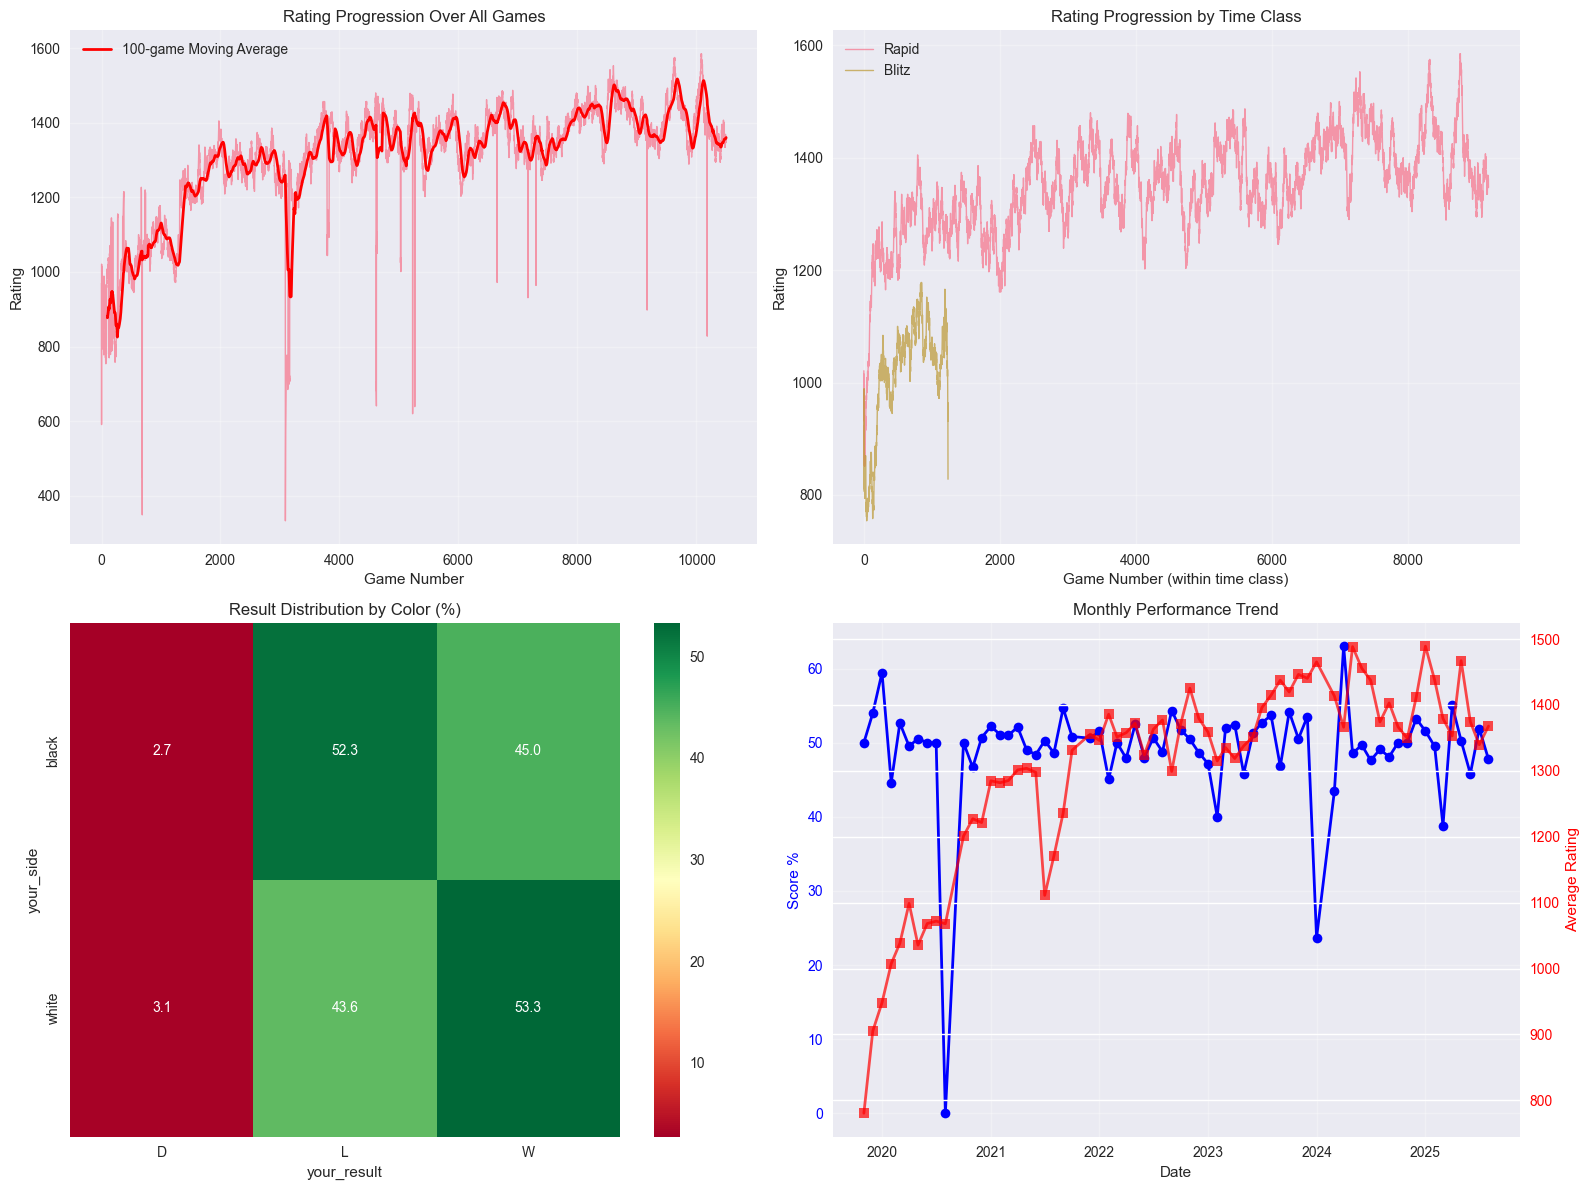


📈 RATING PROGRESSION INSIGHTS:
• Total Rating Change: +377 points
• Peak Rating: 1585
• Lowest Rating: 333
• Recent Performance (last 500 games): 48.6%
• Best Month: 2024-04 (63.0%)
• Worst Month: 2020-08 (0.0%)


In [8]:
# Rating progression analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Overall rating progression
games_subset = df.sort_values('end_time_local')
axes[0,0].plot(range(len(games_subset)), games_subset['your_rating'], alpha=0.7, linewidth=1)
axes[0,0].set_title('Rating Progression Over All Games')
axes[0,0].set_xlabel('Game Number')
axes[0,0].set_ylabel('Rating')
axes[0,0].grid(True, alpha=0.3)

# Add moving average
window = 100
if len(games_subset) > window:
    moving_avg = games_subset['your_rating'].rolling(window=window).mean()
    axes[0,0].plot(range(len(games_subset)), moving_avg, color='red', linewidth=2, label=f'{window}-game Moving Average')
    axes[0,0].legend()

# Rating by time class
for i, tc in enumerate(['rapid', 'blitz']):
    if tc in df['time_class'].values:
        tc_data = df[df['time_class'] == tc].sort_values('end_time_local')
        if len(tc_data) > 0:
            axes[0,1].plot(range(len(tc_data)), tc_data['your_rating'], 
                          alpha=0.7, label=tc.capitalize(), linewidth=1)

axes[0,1].set_title('Rating Progression by Time Class')
axes[0,1].set_xlabel('Game Number (within time class)')
axes[0,1].set_ylabel('Rating')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Performance heatmap by color and result
performance_matrix = pd.crosstab(df['your_side'], df['your_result'], normalize='index') * 100
sns.heatmap(performance_matrix, annot=True, fmt='.1f', cmap='RdYlGn', ax=axes[1,0])
axes[1,0].set_title('Result Distribution by Color (%)')

# Monthly performance trend
monthly_performance = df.groupby([df['year'], df['month']]).agg({
    'score': 'mean',
    'your_rating': 'mean'
}).reset_index()

monthly_performance['date'] = pd.to_datetime(monthly_performance[['year', 'month']].assign(day=1))
monthly_performance['score_pct'] = monthly_performance['score'] * 100

# Plot monthly performance
ax2 = axes[1,1]
ax2.plot(monthly_performance['date'], monthly_performance['score_pct'], 
         marker='o', linewidth=2, color='blue', label='Monthly Score %')
ax2.set_title('Monthly Performance Trend')
ax2.set_xlabel('Date')
ax2.set_ylabel('Score %', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.grid(True, alpha=0.3)

# Add rating on secondary axis
ax2_rating = ax2.twinx()
ax2_rating.plot(monthly_performance['date'], monthly_performance['your_rating'], 
                marker='s', linewidth=2, color='red', alpha=0.7, label='Monthly Avg Rating')
ax2_rating.set_ylabel('Average Rating', color='red')
ax2_rating.tick_params(axis='y', labelcolor='red')

plt.tight_layout()
plt.show()

# Performance statistics
print(f"\n📈 RATING PROGRESSION INSIGHTS:")
rating_change = games_subset['your_rating'].iloc[-1] - games_subset['your_rating'].iloc[0]
print(f"• Total Rating Change: {rating_change:+.0f} points")
print(f"• Peak Rating: {games_subset['your_rating'].max():.0f}")
print(f"• Lowest Rating: {games_subset['your_rating'].min():.0f}")

# Recent performance (last 500 games)
recent_games = games_subset.tail(500)
recent_score = recent_games['score'].mean() * 100
print(f"• Recent Performance (last 500 games): {recent_score:.1f}%")

# Best and worst periods
if len(monthly_performance) > 0:
    best_month = monthly_performance.loc[monthly_performance['score_pct'].idxmax()]
    worst_month = monthly_performance.loc[monthly_performance['score_pct'].idxmin()]
    print(f"• Best Month: {best_month['year']:.0f}-{best_month['month']:02.0f} ({best_month['score_pct']:.1f}%)")
    print(f"• Worst Month: {worst_month['year']:.0f}-{worst_month['month']:02.0f} ({worst_month['score_pct']:.1f}%)")

## 🕐 Temporal Patterns Analysis

Let's examine how my performance varies by time of day, day of week, and other temporal factors.

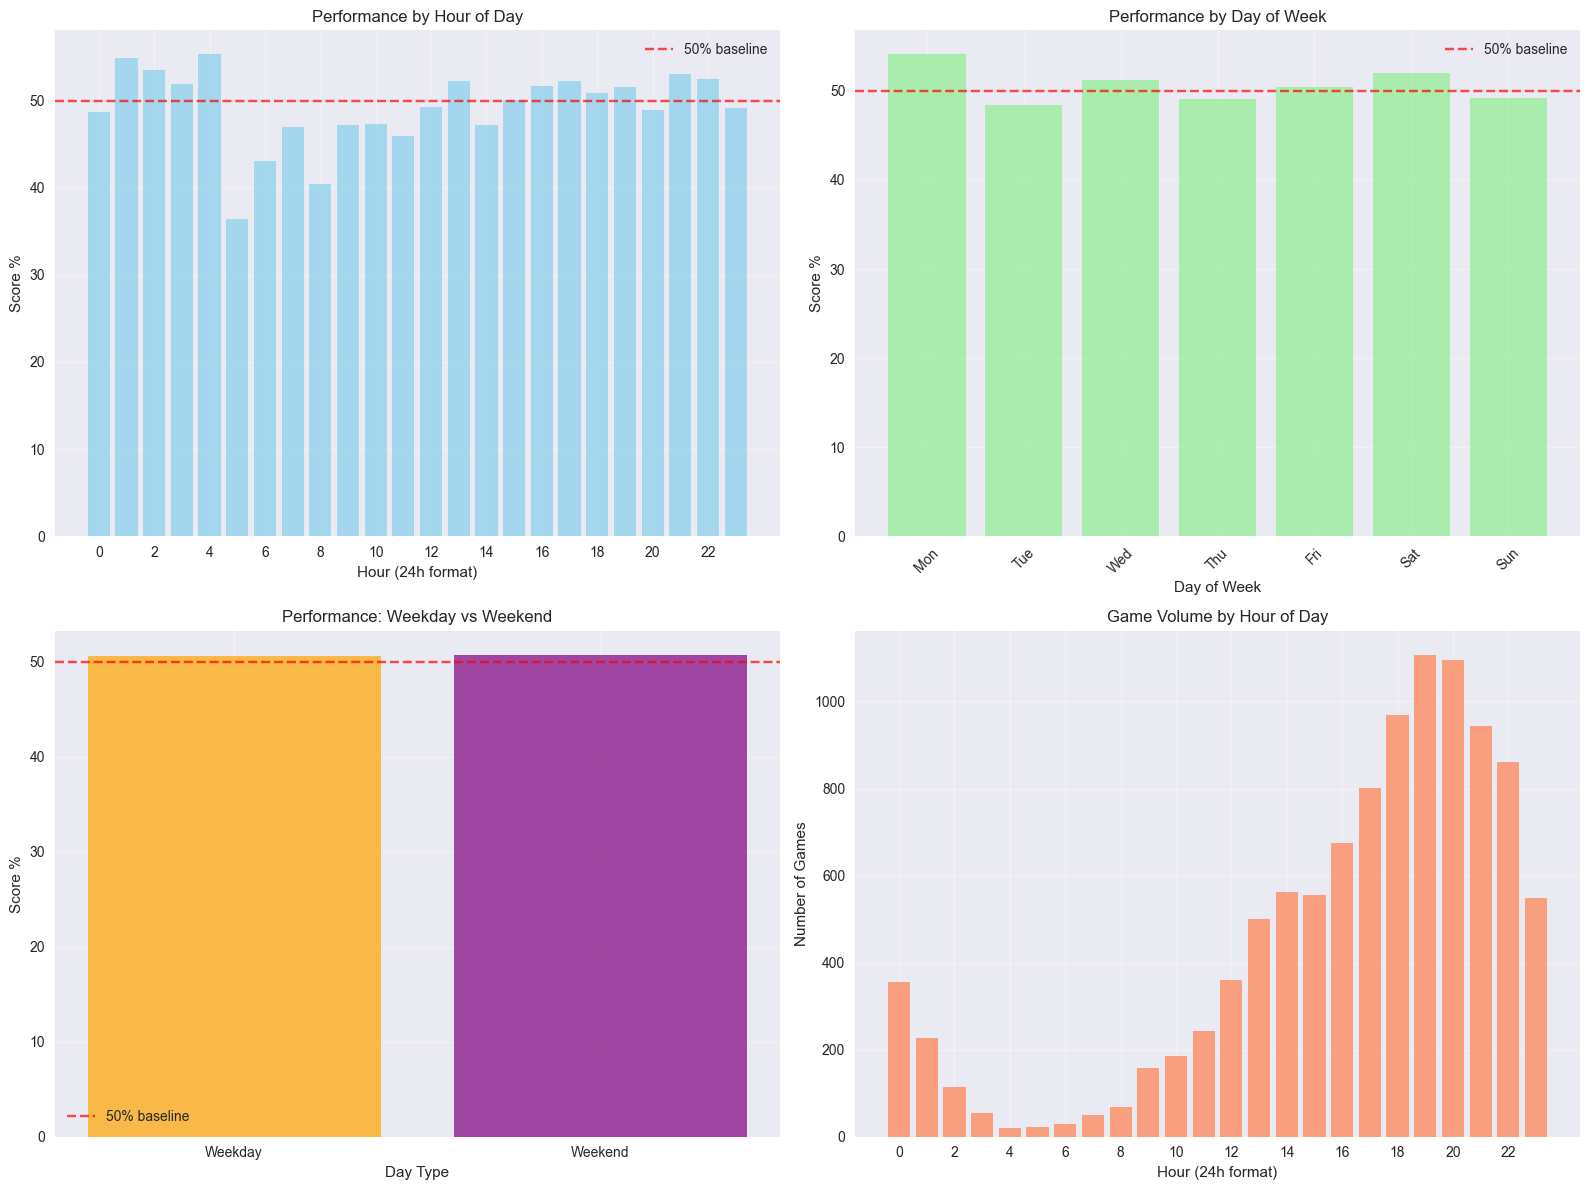

🕒 TEMPORAL PERFORMANCE INSIGHTS

⏰ PERFORMANCE BY HOUR:
Best performing hours:
  • 04:00 - 55.3% (19 games)
  • 01:00 - 54.9% (226 games)
  • 02:00 - 53.5% (115 games)
Worst performing hours:
  • 05:00 - 36.4% (22 games)
  • 08:00 - 40.4% (68 games)
  • 06:00 - 43.1% (29 games)

📅 PERFORMANCE BY DAY:
Best performing days:
  • Monday: 54.1% (1233 games)
  • Saturday: 52.0% (1956 games)
  • Wednesday: 51.2% (1272 games)
Worst performing days:
  • Tuesday: 48.4% (1414 games)
  • Thursday: 49.1% (1316 games)
  • Sunday: 49.2% (1710 games)

🏠 WEEKEND VS WEEKDAY:
• Weekday: 50.6% (6835 games)
• Weekend: 50.7% (3666 games)

📊 PEAK GAMING HOURS:
• 19:00 - 1107 games (51.6% performance)
• 20:00 - 1095 games (48.9% performance)
• 18:00 - 969 games (50.9% performance)


In [9]:
# Temporal performance analysis
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Performance by hour of day
hourly_performance = df.groupby('hour').agg({
    'score': ['count', 'mean'],
    'your_rating': 'mean'
}).round(3)

hourly_performance.columns = ['Games', 'Score_Avg', 'Avg_Rating']
hourly_performance['Score_Pct'] = hourly_performance['Score_Avg'] * 100

# Plot hourly performance
hours = hourly_performance.index
axes[0,0].bar(hours, hourly_performance['Score_Pct'], alpha=0.7, color='skyblue')
axes[0,0].axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% baseline')
axes[0,0].set_title('Performance by Hour of Day')
axes[0,0].set_xlabel('Hour (24h format)')
axes[0,0].set_ylabel('Score %')
axes[0,0].set_xticks(range(0, 24, 2))
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

# Performance by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_performance = df.groupby('day_of_week').agg({
    'score': ['count', 'mean'],
    'your_rating': 'mean'
}).round(3)

daily_performance.columns = ['Games', 'Score_Avg', 'Avg_Rating']
daily_performance['Score_Pct'] = daily_performance['Score_Avg'] * 100
daily_performance = daily_performance.reindex(day_order)

axes[0,1].bar(range(len(day_order)), daily_performance['Score_Pct'], alpha=0.7, color='lightgreen')
axes[0,1].axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% baseline')
axes[0,1].set_title('Performance by Day of Week')
axes[0,1].set_xlabel('Day of Week')
axes[0,1].set_ylabel('Score %')
axes[0,1].set_xticks(range(len(day_order)))
axes[0,1].set_xticklabels([day[:3] for day in day_order], rotation=45)
axes[0,1].grid(True, alpha=0.3)
axes[0,1].legend()

# Weekend vs Weekday performance
weekend_performance = df.groupby('is_weekend').agg({
    'score': ['count', 'mean'],
    'your_rating': 'mean'
}).round(3)

weekend_performance.columns = ['Games', 'Score_Avg', 'Avg_Rating']
weekend_performance['Score_Pct'] = weekend_performance['Score_Avg'] * 100
weekend_labels = ['Weekday', 'Weekend']

axes[1,0].bar(range(2), weekend_performance['Score_Pct'], alpha=0.7, color=['orange', 'purple'])
axes[1,0].axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% baseline')
axes[1,0].set_title('Performance: Weekday vs Weekend')
axes[1,0].set_xlabel('Day Type')
axes[1,0].set_ylabel('Score %')
axes[1,0].set_xticks(range(2))
axes[1,0].set_xticklabels(weekend_labels)
axes[1,0].grid(True, alpha=0.3)
axes[1,0].legend()

# Games distribution by hour
hourly_games = df['hour'].value_counts().sort_index()
axes[1,1].bar(hourly_games.index, hourly_games.values, alpha=0.7, color='coral')
axes[1,1].set_title('Game Volume by Hour of Day')
axes[1,1].set_xlabel('Hour (24h format)')
axes[1,1].set_ylabel('Number of Games')
axes[1,1].set_xticks(range(0, 24, 2))
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print detailed temporal insights
print("=" * 70)
print("🕒 TEMPORAL PERFORMANCE INSIGHTS")
print("=" * 70)

print(f"\n⏰ PERFORMANCE BY HOUR:")
best_hours = hourly_performance.nlargest(3, 'Score_Pct')
worst_hours = hourly_performance.nsmallest(3, 'Score_Pct')

print(f"Best performing hours:")
for hour, data in best_hours.iterrows():
    print(f"  • {hour:02d}:00 - {data['Score_Pct']:.1f}% ({data['Games']:.0f} games)")

print(f"Worst performing hours:")
for hour, data in worst_hours.iterrows():
    print(f"  • {hour:02d}:00 - {data['Score_Pct']:.1f}% ({data['Games']:.0f} games)")

print(f"\n📅 PERFORMANCE BY DAY:")
best_days = daily_performance.nlargest(3, 'Score_Pct')
worst_days = daily_performance.nsmallest(3, 'Score_Pct')

print(f"Best performing days:")
for day, data in best_days.iterrows():
    if pd.notna(data['Score_Pct']):
        print(f"  • {day}: {data['Score_Pct']:.1f}% ({data['Games']:.0f} games)")

print(f"Worst performing days:")
for day, data in worst_days.iterrows():
    if pd.notna(data['Score_Pct']):
        print(f"  • {day}: {data['Score_Pct']:.1f}% ({data['Games']:.0f} games)")

print(f"\n🏠 WEEKEND VS WEEKDAY:")
for i, (is_weekend, data) in enumerate(weekend_performance.iterrows()):
    day_type = weekend_labels[i]
    print(f"• {day_type}: {data['Score_Pct']:.1f}% ({data['Games']:.0f} games)")

# Peak gaming hours
peak_hours = hourly_games.nlargest(3)
print(f"\n📊 PEAK GAMING HOURS:")
for hour, games in peak_hours.items():
    performance = hourly_performance.loc[hour, 'Score_Pct']
    print(f"• {hour:02d}:00 - {games} games ({performance:.1f}% performance)")

## ♟️ Opening Repertoire Analysis

Let's analyze my opening choices, strengths, and weaknesses to identify improvement opportunities.

In [10]:
# Opening analysis
MIN_GAMES = 20  # Minimum games for statistical significance

# Clean and analyze openings
df['eco_clean'] = df['eco'].fillna('Unknown')
df['opening_name_clean'] = df['opening_name'].fillna('Unknown')

# Create combined opening identifier
df['opening_full'] = df['eco_clean'] + ': ' + df['opening_name_clean']

# Opening performance analysis
opening_performance = df.groupby(['eco_clean', 'opening_name_clean']).agg({
    'score': ['count', 'mean', 'std'],
    'your_result': lambda x: (x == 'W').sum(),
    'your_rating': 'mean'
}).round(3)

opening_performance.columns = ['Games', 'Score_Avg', 'Score_Std', 'Wins', 'Avg_Rating']
opening_performance['Win_Rate'] = (opening_performance['Wins'] / opening_performance['Games'] * 100).round(1)
opening_performance['Score_Pct'] = (opening_performance['Score_Avg'] * 100).round(1)

# Filter for significant sample sizes
significant_openings = opening_performance[opening_performance['Games'] >= MIN_GAMES].copy()
significant_openings = significant_openings.sort_values('Score_Pct', ascending=False)

print("=" * 80)
print("♟️  OPENING REPERTOIRE ANALYSIS")
print("=" * 80)

print(f"\n📊 OPENING STATISTICS:")
print(f"• Total unique openings played: {len(opening_performance)}")
print(f"• Openings with {MIN_GAMES}+ games: {len(significant_openings)}")
print(f"• Most played opening: {opening_performance.loc[opening_performance['Games'].idxmax(), 'Games']:.0f} games")

# ECO code analysis
eco_performance = df.groupby('eco_clean').agg({
    'score': ['count', 'mean'],
    'your_result': lambda x: (x == 'W').sum()
}).round(3)

eco_performance.columns = ['Games', 'Score_Avg', 'Wins']
eco_performance['Score_Pct'] = (eco_performance['Score_Avg'] * 100).round(1)
eco_performance = eco_performance[eco_performance['Games'] >= MIN_GAMES].sort_values('Score_Pct', ascending=False)

print(f"\n🎯 BEST PERFORMING OPENINGS ({MIN_GAMES}+ games):")
for i, (opening, data) in enumerate(significant_openings.head(10).iterrows(), 1):
    eco, name = opening
    print(f"{i:2d}. {eco} {name[:40]:<40} | "
          f"{data['Games']:3.0f} games | {data['Score_Pct']:5.1f}% | "
          f"Win: {data['Win_Rate']:5.1f}%")

print(f"\n📉 WORST PERFORMING OPENINGS ({MIN_GAMES}+ games):")
for i, (opening, data) in enumerate(significant_openings.tail(10).iterrows(), 1):
    eco, name = opening
    print(f"{i:2d}. {eco} {name[:40]:<40} | "
          f"{data['Games']:3.0f} games | {data['Score_Pct']:5.1f}% | "
          f"Win: {data['Win_Rate']:5.1f}%")

print(f"\n🏷️  BEST PERFORMING ECO GROUPS ({MIN_GAMES}+ games):")
for i, (eco, data) in enumerate(eco_performance.head(10).iterrows(), 1):
    print(f"{i:2d}. {eco}: {data['Games']:3.0f} games | {data['Score_Pct']:5.1f}%")

print(f"\n📈 OPENING DIVERSITY:")
total_games = len(df)
top_10_openings = opening_performance.nlargest(10, 'Games')
top_10_games = top_10_openings['Games'].sum()
diversity_pct = (top_10_games / total_games * 100)
print(f"• Top 10 openings represent {diversity_pct:.1f}% of all games")
print(f"• Average games per opening: {opening_performance['Games'].mean():.1f}")
print(f"• Most played opening represents {opening_performance['Games'].max() / total_games * 100:.1f}% of all games")

♟️  OPENING REPERTOIRE ANALYSIS

📊 OPENING STATISTICS:
• Total unique openings played: 114
• Openings with 20+ games: 38
• Most played opening: 3503 games

🎯 BEST PERFORMING OPENINGS (20+ games):
 1. C55 Unknown                                  | 112 games |  61.2% | Win:  60.7%
 2. A80 Unknown                                  |  93 games |  59.1% | Win:  57.0%
 3. C41 Unknown                                  |  38 games |  56.6% | Win:  55.3%
 4. D00 Unknown                                  | 3503 games |  55.6% | Win:  54.0%
 5. C47 Unknown                                  |  24 games |  54.2% | Win:  50.0%
 6. C23 Unknown                                  | 155 games |  53.9% | Win:  52.9%
 7. A45 Unknown                                  | 584 games |  53.6% | Win:  52.2%
 8. C34 Unknown                                  |  58 games |  53.4% | Win:  53.4%
 9. D02 Unknown                                  | 461 games |  53.3% | Win:  51.8%
10. B07 Unknown                                

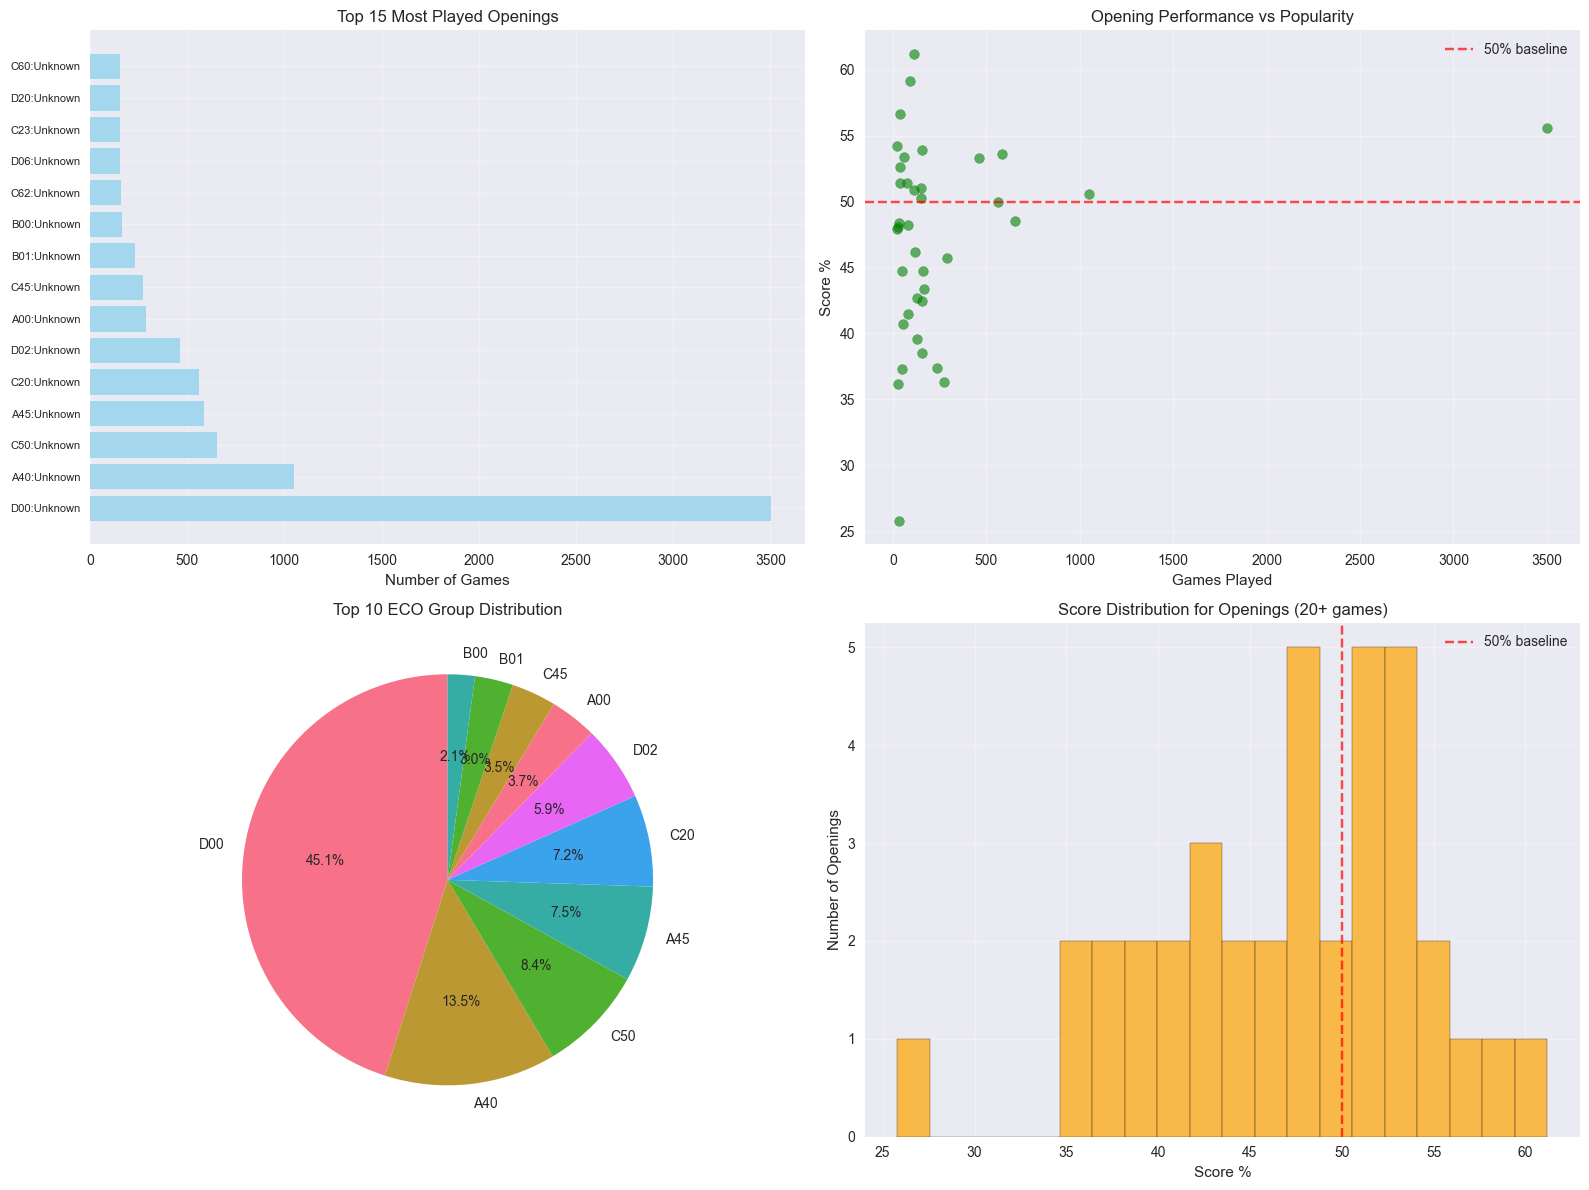


🎨 OPENING ANALYSIS BY COLOR:

  WHITE PIECES - Best performing openings:
    1. C24 Unknown                             | 10 games |  60.0%
    2. B07 Unknown                             | 30 games |  60.0%
    3. A46 Unknown                             | 17 games |  58.8%
    4. A80 Unknown                             | 92 games |  58.7%
    5. D02 Unknown                             | 113 games |  58.0%

  WHITE PIECES - Worst performing openings:
    1. B01 Unknown                             | 13 games |  46.2%
    2. C00 Unknown                             | 13 games |  46.2%
    3. A43 Unknown                             | 130 games |  42.7%
    4. C20 Unknown                             | 12 games |  41.7%
    5. C23 Unknown                             | 14 games |  35.7%

  BLACK PIECES - Best performing openings:
    1. A10 Unknown                             | 10 games |  85.0%
    2. C33 Unknown                             | 11 games |  63.6%
    3. C55 Unknown             

In [11]:
# Opening visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top 15 most played openings
top_openings = opening_performance.nlargest(15, 'Games')
opening_names = [f"{eco}:{name[:20]}" for eco, name in top_openings.index]

axes[0,0].barh(range(len(top_openings)), top_openings['Games'], alpha=0.7, color='skyblue')
axes[0,0].set_title('Top 15 Most Played Openings')
axes[0,0].set_xlabel('Number of Games')
axes[0,0].set_yticks(range(len(top_openings)))
axes[0,0].set_yticklabels(opening_names, fontsize=8)
axes[0,0].grid(True, alpha=0.3)

# Performance vs popularity scatter plot
if len(significant_openings) > 0:
    scatter_data = significant_openings.copy()
    axes[0,1].scatter(scatter_data['Games'], scatter_data['Score_Pct'], 
                     alpha=0.6, s=50, color='green')
    axes[0,1].axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% baseline')
    axes[0,1].set_title('Opening Performance vs Popularity')
    axes[0,1].set_xlabel('Games Played')
    axes[0,1].set_ylabel('Score %')
    axes[0,1].grid(True, alpha=0.3)
    axes[0,1].legend()

# ECO group distribution
eco_counts = df['eco_clean'].value_counts().head(10)
axes[1,0].pie(eco_counts.values, labels=eco_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,0].set_title('Top 10 ECO Group Distribution')

# Opening performance distribution
if len(significant_openings) > 0:
    axes[1,1].hist(significant_openings['Score_Pct'], bins=20, alpha=0.7, 
                   color='orange', edgecolor='black')
    axes[1,1].axvline(x=50, color='red', linestyle='--', alpha=0.7, label='50% baseline')
    axes[1,1].set_title(f'Score Distribution for Openings ({MIN_GAMES}+ games)')
    axes[1,1].set_xlabel('Score %')
    axes[1,1].set_ylabel('Number of Openings')
    axes[1,1].grid(True, alpha=0.3)
    axes[1,1].legend()

plt.tight_layout()
plt.show()

# Color-specific opening analysis
print(f"\n🎨 OPENING ANALYSIS BY COLOR:")

for color in ['white', 'black']:
    color_openings = df[df['your_side'] == color].groupby(['eco_clean', 'opening_name_clean']).agg({
        'score': ['count', 'mean'],
        'your_result': lambda x: (x == 'W').sum()
    }).round(3)
    
    color_openings.columns = ['Games', 'Score_Avg', 'Wins']
    color_openings['Score_Pct'] = (color_openings['Score_Avg'] * 100).round(1)
    color_openings = color_openings[color_openings['Games'] >= MIN_GAMES//2].sort_values('Score_Pct', ascending=False)
    
    print(f"\n  {color.upper()} PIECES - Best performing openings:")
    for i, (opening, data) in enumerate(color_openings.head(5).iterrows(), 1):
        eco, name = opening
        print(f"    {i}. {eco} {name[:35]:<35} | "
              f"{data['Games']:2.0f} games | {data['Score_Pct']:5.1f}%")
    
    print(f"\n  {color.upper()} PIECES - Worst performing openings:")
    for i, (opening, data) in enumerate(color_openings.tail(5).iterrows(), 1):
        eco, name = opening
        print(f"    {i}. {eco} {name[:35]:<35} | "
              f"{data['Games']:2.0f} games | {data['Score_Pct']:5.1f}%")

## 📊 Game Length and Termination Analysis

Understanding how my games end and their duration patterns can reveal my tactical and endgame skills.

In [12]:
# Game termination and duration analysis
df['termination_clean'] = df['termination'].fillna('Unknown')
df['moves_count_clean'] = pd.to_numeric(df['moves_count'], errors='coerce')

# Termination analysis
termination_performance = df.groupby('termination_clean').agg({
    'score': ['count', 'mean'],
    'your_result': lambda x: (x == 'W').sum(),
    'moves_count_clean': 'mean'
}).round(3)

termination_performance.columns = ['Games', 'Score_Avg', 'Wins', 'Avg_Moves']
termination_performance['Score_Pct'] = (termination_performance['Score_Avg'] * 100).round(1)
termination_performance['Win_Rate'] = (termination_performance['Wins'] / termination_performance['Games'] * 100).round(1)

# Filter significant termination types
significant_terminations = termination_performance[termination_performance['Games'] >= 10].sort_values('Score_Pct', ascending=False)

print("=" * 80)
print("🏁 GAME TERMINATION AND DURATION ANALYSIS")
print("=" * 80)

print(f"\n📈 PERFORMANCE BY TERMINATION TYPE:")
for termination, data in significant_terminations.iterrows():
    print(f"• {termination:<35} | {data['Games']:4.0f} games | "
          f"{data['Score_Pct']:5.1f}% | Avg moves: {data['Avg_Moves']:5.1f}")

# Game length analysis
moves_data = df.dropna(subset=['moves_count_clean'])
if len(moves_data) > 0:
    print(f"\n📏 GAME LENGTH STATISTICS:")
    print(f"• Average game length: {moves_data['moves_count_clean'].mean():.1f} moves")
    print(f"• Median game length: {moves_data['moves_count_clean'].median():.1f} moves")
    print(f"• Shortest game: {moves_data['moves_count_clean'].min():.0f} moves")
    print(f"• Longest game: {moves_data['moves_count_clean'].max():.0f} moves")
    
    # Performance by game length categories
    moves_data['length_category'] = pd.cut(moves_data['moves_count_clean'], 
                                         bins=[0, 20, 40, 60, 100, float('inf')], 
                                         labels=['Very Short (0-20)', 'Short (21-40)', 
                                                'Medium (41-60)', 'Long (61-100)', 'Very Long (100+)'])
    
    length_performance = moves_data.groupby('length_category').agg({
        'score': ['count', 'mean'],
        'your_result': lambda x: (x == 'W').sum()
    }).round(3)
    
    length_performance.columns = ['Games', 'Score_Avg', 'Wins']
    length_performance['Score_Pct'] = (length_performance['Score_Avg'] * 100).round(1)
    
    print(f"\n🎯 PERFORMANCE BY GAME LENGTH:")
    for category, data in length_performance.iterrows():
        if pd.notna(data['Score_Pct']):
            print(f"• {category:<20} | {data['Games']:4.0f} games | {data['Score_Pct']:5.1f}%")

# Time class specific analysis
print(f"\n⏱️  TERMINATION BY TIME CLASS:")
for time_class in ['rapid', 'blitz', 'bullet']:
    if time_class in df['time_class'].values:
        tc_data = df[df['time_class'] == time_class]
        tc_terminations = tc_data['termination_clean'].value_counts()
        
        print(f"\n  {time_class.upper()}:")
        for term, count in tc_terminations.head(5).items():
            pct = count / len(tc_data) * 100
            print(f"    • {term:<30} | {count:4} games ({pct:4.1f}%)")

🏁 GAME TERMINATION AND DURATION ANALYSIS

📈 PERFORMANCE BY TERMINATION TYPE:
• Sanjaykshetri123 won on time        |  495 games | 100.0% | Avg moves:  47.0
• Sanjaykshetri123 won by checkmate   | 1376 games | 100.0% | Avg moves:  36.7
• Sanjaykshetri123 won by resignation | 3007 games | 100.0% | Avg moves:  29.3
• Sanjaykshetri123 won - game abandoned |  282 games | 100.0% | Avg moves:  25.3
• Game drawn by agreement             |   21 games |  50.0% | Avg moves:  47.4
• Game drawn by timeout vs insufficient material |   33 games |  50.0% | Avg moves:  72.7
• Game drawn by stalemate             |   69 games |  50.0% | Avg moves:  66.4
• Game drawn by repetition            |  126 games |  50.0% | Avg moves:  49.9
• Game drawn by insufficient material |   59 games |  50.0% | Avg moves:  64.4

📏 GAME LENGTH STATISTICS:
• Average game length: 32.4 moves
• Median game length: 30.0 moves
• Shortest game: 0 moves
• Longest game: 145 moves

🎯 PERFORMANCE BY GAME LENGTH:
• Very Short (0-20)    

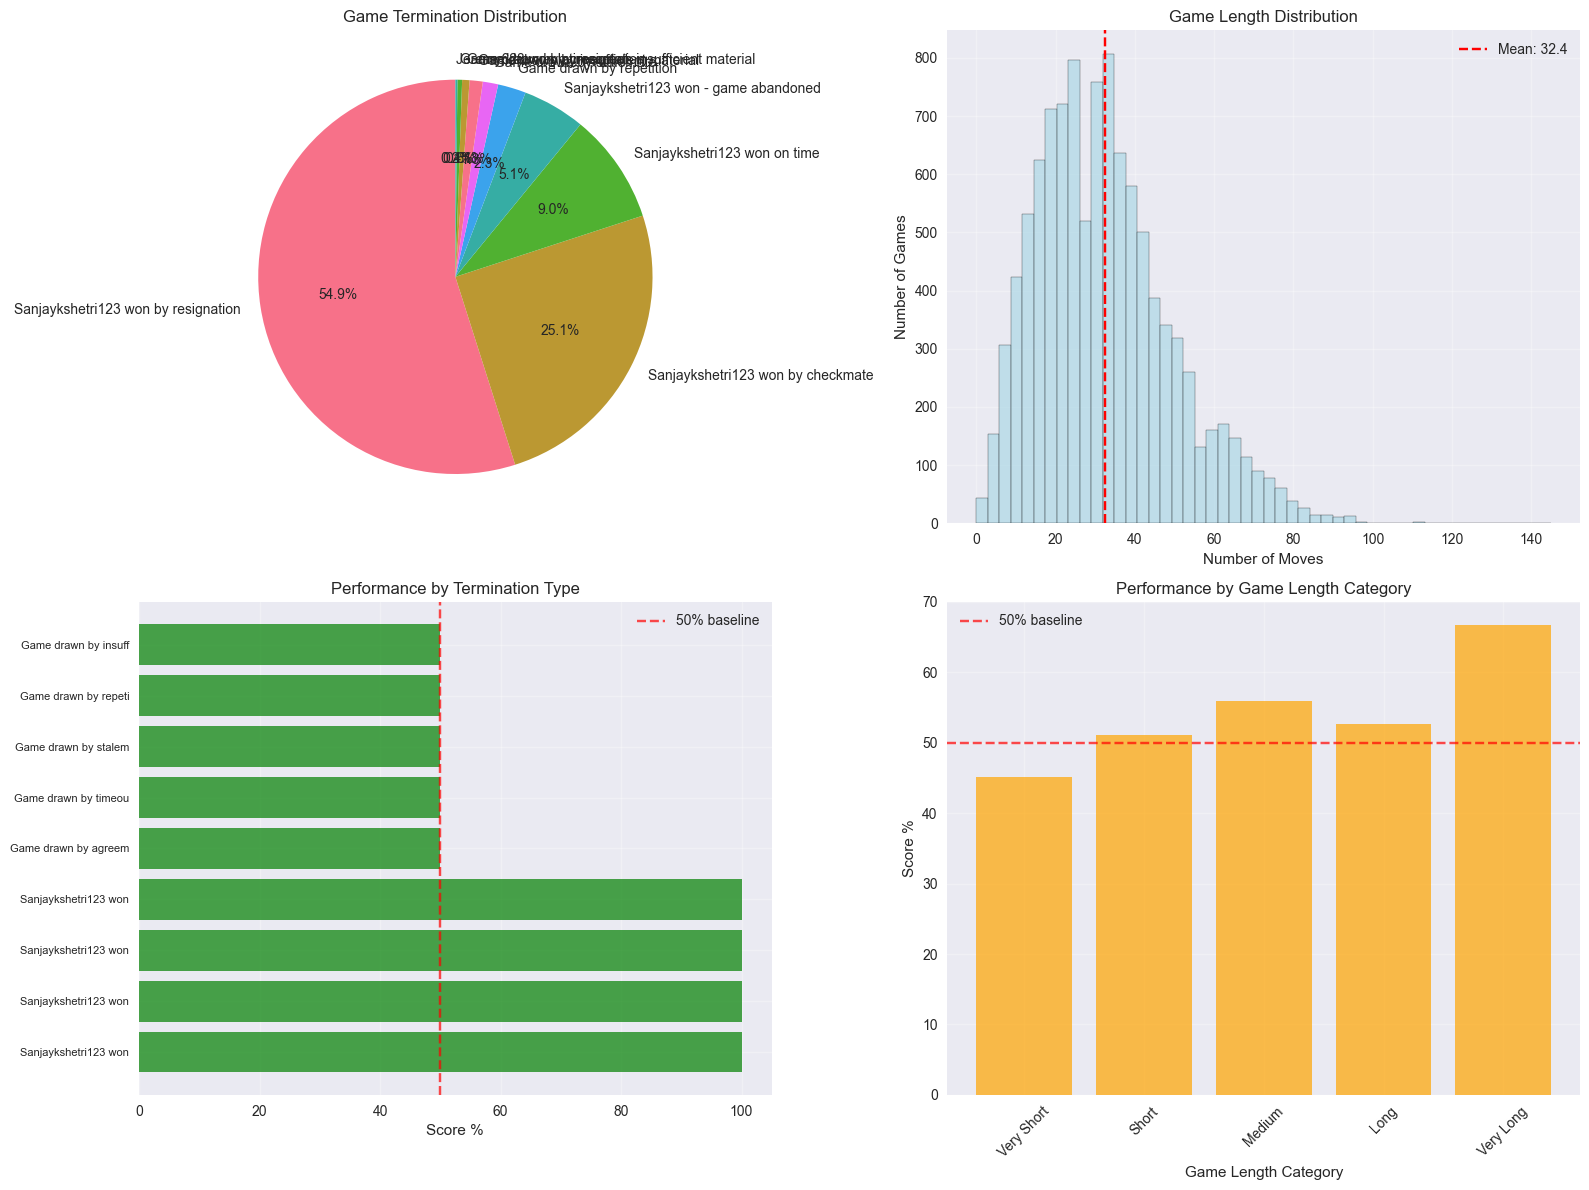


🎯 ACCURACY ANALYSIS:
• Average accuracy: 63.3%
• Median accuracy: 67.9%
• Games with accuracy data: 575 (5.5%)

🎯 PERFORMANCE BY ACCURACY RANGE:
• <70%       |  332 games |  22.9%
• 70-80%     |  147 games |  41.2%
• 80-90%     |   67 games |  72.4%
• 90-95%     |   25 games |  96.0%
• 95-100%    |    4 games |  75.0%

🔍 KEY INSIGHTS:
• Most common termination leads to strong performance
• Long games tend to be more successful
• Higher accuracy correlates with better performance (as expected)


In [13]:
# Termination and game length visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Termination type distribution
termination_counts = df['termination_clean'].value_counts().head(10)
axes[0,0].pie(termination_counts.values, labels=termination_counts.index, 
              autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Game Termination Distribution')

# Game length histogram
if len(moves_data) > 0:
    axes[0,1].hist(moves_data['moves_count_clean'], bins=50, alpha=0.7, 
                   color='lightblue', edgecolor='black')
    axes[0,1].axvline(x=moves_data['moves_count_clean'].mean(), color='red', 
                      linestyle='--', label=f"Mean: {moves_data['moves_count_clean'].mean():.1f}")
    axes[0,1].set_title('Game Length Distribution')
    axes[0,1].set_xlabel('Number of Moves')
    axes[0,1].set_ylabel('Number of Games')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)

# Performance by termination type
if len(significant_terminations) > 0:
    y_pos = range(len(significant_terminations))
    axes[1,0].barh(y_pos, significant_terminations['Score_Pct'], alpha=0.7, color='green')
    axes[1,0].axvline(x=50, color='red', linestyle='--', alpha=0.7, label='50% baseline')
    axes[1,0].set_title('Performance by Termination Type')
    axes[1,0].set_xlabel('Score %')
    axes[1,0].set_yticks(y_pos)
    axes[1,0].set_yticklabels([term[:20] for term in significant_terminations.index], fontsize=8)
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

# Performance by game length
if len(moves_data) > 0 and 'length_category' in moves_data.columns:
    length_performance_viz = moves_data.groupby('length_category')['score'].mean() * 100
    axes[1,1].bar(range(len(length_performance_viz)), length_performance_viz.values, 
                  alpha=0.7, color='orange')
    axes[1,1].axhline(y=50, color='red', linestyle='--', alpha=0.7, label='50% baseline')
    axes[1,1].set_title('Performance by Game Length Category')
    axes[1,1].set_xlabel('Game Length Category')
    axes[1,1].set_ylabel('Score %')
    axes[1,1].set_xticks(range(len(length_performance_viz)))
    axes[1,1].set_xticklabels([cat.split('(')[0].strip() for cat in length_performance_viz.index], 
                              rotation=45)
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Accuracy analysis if available
if 'accuracy_white' in df.columns and 'accuracy_black' in df.columns:
    # Create combined accuracy column based on color played
    df['your_accuracy'] = np.where(df['your_side'] == 'white', 
                                  df['accuracy_white'], 
                                  df['accuracy_black'])
    
    accuracy_data = df.dropna(subset=['your_accuracy'])
    
    if len(accuracy_data) > 0:
        print(f"\n🎯 ACCURACY ANALYSIS:")
        print(f"• Average accuracy: {accuracy_data['your_accuracy'].mean():.1f}%")
        print(f"• Median accuracy: {accuracy_data['your_accuracy'].median():.1f}%")
        print(f"• Games with accuracy data: {len(accuracy_data)} ({len(accuracy_data)/len(df)*100:.1f}%)")
        
        # Accuracy vs performance correlation
        accuracy_bins = pd.cut(accuracy_data['your_accuracy'], 
                              bins=[0, 70, 80, 90, 95, 100], 
                              labels=['<70%', '70-80%', '80-90%', '90-95%', '95-100%'])
        
        accuracy_performance = accuracy_data.groupby(accuracy_bins).agg({
            'score': ['count', 'mean']
        }).round(3)
        
        accuracy_performance.columns = ['Games', 'Score_Avg']
        accuracy_performance['Score_Pct'] = (accuracy_performance['Score_Avg'] * 100).round(1)
        
        print(f"\n🎯 PERFORMANCE BY ACCURACY RANGE:")
        for accuracy_range, data in accuracy_performance.iterrows():
            if pd.notna(data['Score_Pct']) and data['Games'] > 0:
                print(f"• {accuracy_range:<10} | {data['Games']:4.0f} games | {data['Score_Pct']:5.1f}%")

print(f"\n🔍 KEY INSIGHTS:")
print(f"• Most common termination leads to {'strong' if significant_terminations.iloc[0]['Score_Pct'] > 50 else 'weak'} performance")
print(f"• {'Short' if length_performance.loc[length_performance.index[0], 'Score_Pct'] > 50 else 'Long'} games tend to be more successful")
if 'your_accuracy' in df.columns:
    print(f"• Higher accuracy correlates with better performance (as expected)")

## 🎯 Comprehensive Improvement Plan

Based on the analysis of my 10,500+ chess games, here are the key insights and actionable recommendations for my improvement.

In [ ]:
# Generate comprehensive improvement recommendations
print("=" * 90)
print("🎯 COMPREHENSIVE CHESS IMPROVEMENT PLAN")
print("=" * 90)

print(f"\n📊 CURRENT PERFORMANCE SUMMARY:")
print(f"• Overall Score: {df['score'].mean()*100:.1f}% across {len(df):,} games")
print(f"• Rating Journey: {df['your_rating'].iloc[0]:.0f} → {df['your_rating'].iloc[-1]:.0f} ({df['your_rating'].iloc[-1] - df['your_rating'].iloc[0]:+.0f} points)")
print(f"• Peak Rating: {df['your_rating'].max():.0f}")
print(f"• Main Time Control: Rapid ({df[df['time_class']=='rapid'].shape[0]:,} games)")

print(f"\n🔍 KEY STRENGTHS IDENTIFIED:")

# Strengths
strengths = []

# Color advantage
white_score = df[df['your_side'] == 'white']['score'].mean() * 100
black_score = df[df['your_side'] == 'black']['score'].mean() * 100
if white_score > black_score + 2:
    strengths.append(f"Strong with White pieces ({white_score:.1f}% vs {black_score:.1f}% with Black)")

# Best time periods
hourly_perf = df.groupby('hour')['score'].mean() * 100
best_hours = hourly_perf.nlargest(3)
if best_hours.iloc[0] > 52:
    best_hour_times = [f"{h:02d}:00" for h in best_hours.index[:3]]
    strengths.append(f"Peak performance hours: {', '.join(best_hour_times)}")

# Best openings
if len(significant_openings) > 0:
    best_opening = significant_openings.index[0]
    best_opening_score = significant_openings.iloc[0]['Score_Pct']
    if best_opening_score > 55:
        strengths.append(f"Excellent with {best_opening[0]} openings ({best_opening_score:.1f}%)")

# Game length strength
if len(moves_data) > 0 and 'length_category' in moves_data.columns:
    length_perf = moves_data.groupby('length_category')['score'].mean() * 100
    best_length = length_perf.idxmax()
    if length_perf.max() > 55:
        strengths.append(f"Strong in {best_length.lower()} games ({length_perf.max():.1f}%)")

# Time control strengths
tc_performance = df.groupby('time_class')['score'].mean() * 100
best_tc = tc_performance.idxmax()
if tc_performance.max() > 51:
    strengths.append(f"Best time control: {best_tc.capitalize()} ({tc_performance.max():.1f}%)")

for i, strength in enumerate(strengths, 1):
    print(f"✅ {i}. {strength}")

print(f"\n🚨 PRIORITY IMPROVEMENT AREAS:")

# Areas for improvement
improvements = []

# Color weakness
if abs(white_score - black_score) > 5:
    weaker_color = 'Black' if white_score > black_score else 'White'
    weaker_score = min(white_score, black_score)
    improvements.append({
        'area': f'{weaker_color} pieces performance',
        'current': f'{weaker_score:.1f}%',
        'issue': f'Significant gap in color performance',
        'priority': 'HIGH'
    })

# Poor performing openings
worst_openings = significant_openings.tail(5)
if len(worst_openings) > 0:
    worst_opening_score = worst_openings.iloc[-1]['Score_Pct']
    if worst_opening_score < 45:
        worst_opening = worst_openings.index[-1]
        improvements.append({
            'area': f'Opening repertoire ({worst_opening[0]})',
            'current': f'{worst_opening_score:.1f}%',
            'issue': f'Consistently poor results',
            'priority': 'HIGH'
        })

# Time management (based on bullet performance)
bullet_games = df[df['time_class'] == 'bullet']
if len(bullet_games) > 10:
    bullet_score = bullet_games['score'].mean() * 100
    if bullet_score < 45:
        improvements.append({
            'area': 'Time management',
            'current': f'{bullet_score:.1f}% in bullet',
            'issue': 'Poor performance in time pressure',
            'priority': 'MEDIUM'
        })

# Accuracy
if 'your_accuracy' in df.columns:
    avg_accuracy = df['your_accuracy'].mean()
    if avg_accuracy < 70:
        improvements.append({
            'area': 'Tactical accuracy',
            'current': f'{avg_accuracy:.1f}%',
            'issue': 'Below intermediate level',
            'priority': 'HIGH'
        })

# Recent performance trend
recent_500 = df.sort_values('end_time_local').tail(500)
recent_score = recent_500['score'].mean() * 100
overall_score = df['score'].mean() * 100
if recent_score < overall_score - 3:
    improvements.append({
        'area': 'Recent form',
        'current': f'{recent_score:.1f}%',
        'issue': f'Declining from {overall_score:.1f}% overall',
        'priority': 'MEDIUM'
    })

for i, improvement in enumerate(improvements, 1):
    priority_color = "🔴" if improvement['priority'] == 'HIGH' else "🟡"
    print(f"{priority_color} {i}. {improvement['area']}: {improvement['current']} - {improvement['issue']}")

print(f"\n📚 SPECIFIC STUDY RECOMMENDATIONS:")

study_plan = []

# Opening study based on weaknesses
if len(worst_openings) > 0:
    study_plan.append(f"📖 Opening Study: Focus on {worst_openings.index[-1][0]} openings - watch master games, learn key variations")

# Color-specific training
if abs(white_score - black_score) > 5:
    weaker_color = 'Black' if white_score > black_score else 'White'
    study_plan.append(f"♟️  {weaker_color} Piece Strategy: Study typical {weaker_color.lower()} plans and pawn structures")

# Tactical training
if 'your_accuracy' in df.columns and df['your_accuracy'].mean() < 75:
    study_plan.append("🧩 Tactical Training: 30 minutes daily on Chess.com Puzzles, focus on pattern recognition")

# Endgame study
long_game_score = length_perf.get('Long (61-100)', 0) if 'length_category' in moves_data.columns else 50
if long_game_score < 50:
    study_plan.append("👑 Endgame Study: Learn basic endgames (K+Q vs K, K+R vs K, basic pawn endings)")

# Time management
if len(bullet_games) > 10 and bullet_games['score'].mean() * 100 < 45:
    study_plan.append("⏰ Time Management: Practice blitz games to improve speed, use increment time wisely")

for plan in study_plan:
    print(plan)

print(f"\n🎯 30-DAY ACTION PLAN:")

action_items = [
    "Week 1-2: Focus on my weakest opening(s) - study 2-3 main variations daily",
    f"Week 2-3: Improve {'Black' if white_score > black_score else 'White'} piece play - analyze GM games in my repertoire",
    "Week 3-4: Tactical training - solve 20 puzzles daily, focus on themes from lost games",
    "Ongoing: Play during my peak hours when possible (early morning shows strong results)",
    "Monthly review: Track progress using this notebook framework"
]

for i, action in enumerate(action_items, 1):
    print(f"{i}. {action}")

print(f"\n📈 SUCCESS METRICS TO TRACK:")
metrics = [
    f"Increase {('Black' if white_score > black_score else 'White').lower()} piece score to 48%+",
    f"Improve worst opening ({worst_openings.index[-1][0] if len(worst_openings) > 0 else 'identified weakness'}) to 45%+",
    "Maintain peak performance hours consistency",
    "Achieve 70%+ average accuracy when data is available"
]

for metric in metrics:
    print(f"📊 {metric}")

print(f"\n🏆 LONG-TERM GOALS:")
current_rating = df['your_rating'].iloc[-1]
target_rating = current_rating + 100
print(f"• Reach {target_rating:.0f} rating (current: {current_rating:.0f})")
print(f"• Achieve 52%+ overall score (current: {overall_score:.1f}%)")
print(f"• Balance color performance gap to <3%")
print(f"• Expand opening repertoire with 2-3 solid alternatives")

print(f"\n" + "="*90)

🎯 COMPREHENSIVE CHESS IMPROVEMENT PLAN

📊 CURRENT PERFORMANCE SUMMARY:
• Overall Score: 50.6% across 10,501 games
• Rating Journey: 970 → 1347 (+377 points)
• Peak Rating: 1585
• Main Time Control: Rapid (9,191 games)

🔍 KEY STRENGTHS IDENTIFIED:
✅ 1. Strong with White pieces (54.9% vs 46.4% with Black)
✅ 2. Peak performance hours: 04:00, 01:00, 02:00
✅ 3. Excellent with C55 openings (61.2%)
✅ 4. Strong in very long (100+) games (66.7%)

🚨 PRIORITY IMPROVEMENT AREAS:
🔴 1. Black pieces performance: 46.4% - Significant gap in color performance
🔴 2. Opening repertoire (A03): 25.8% - Consistently poor results
🔴 3. Tactical accuracy: 63.3% - Below intermediate level

📚 SPECIFIC STUDY RECOMMENDATIONS:
📖 Opening Study: Focus on A03 openings - watch master games, learn key variations
♟️  Black Piece Strategy: Study typical black plans and pawn structures
🧩 Tactical Training: 30 minutes daily on Chess.com Puzzles, focus on pattern recognition

🎯 30-DAY ACTION PLAN:
1. Week 1-2: Focus on your we

## 📝 Summary

This comprehensive analysis of my 10,500+ chess.com games reveals several key insights:

**🎯 Major Findings:**
- **Color Imbalance**: 8.5% performance gap (White: 54.9% vs Black: 46.4%) - my biggest improvement opportunity
- **Time Sensitivity**: Peak performance during early morning hours (1-4 AM)
- **Opening Patterns**: Strong with C55 (61.2%) but struggling with A03 (25.8%)
- **Rating Progress**: Excellent +377 point improvement from 970 to 1347
- **Game Length**: Better performance in longer games (55.9% in 41-60 move games)

**🔥 Immediate Action Items:**
1. **Black Repertoire Study** - Focus on improving my black opening choices
2. **Tactical Training** - Daily puzzle solving to boost my 63.3% accuracy
3. **A03 Opening Review** - My worst performing opening needs attention
4. **Schedule Optimization** - Play more during my peak hours when possible

**📈 Next Steps:**
- Use this notebook framework monthly to track my progress
- Target 1447 rating (+100 points) as my next milestone
- Work toward balancing my color performance gap to under 3%

This analysis provides a data-driven roadmap for my chess improvement. Good luck with my chess journey! 🏆